# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'?appid={weather_api_key}&units=imperial&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | kailua-kona
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | nelson bay
Processing Record 6 of Set 1 | howrah
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | persembe
Processing Record 13 of Set 1 | hadibu
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | tartagal
Processing Record 18 of Set 1 | gisborne
Processing Record 19 of Set 1 | elliot lake
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | twon-brass
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | nassau
Processing Record 40 of Set 4 | santa elena de uairen
Processing Record 41 of Set 4 | chonchi
Processing Record 42 of Set 4 | hailey
Processing Record 43 of Set 4 | feodosiya
Processing Record 44 of Set 4 | crane
Processing Record 45 of Set 4 | akureyri
Processing Record 46 of Set 4 | kyaikkami
Processing Record 47 of Set 4 | xiaoweizhai
Processing Record 48 of Set 4 | inhambane
Processing Record 49 of Set 4 | happy valley-goose bay
Processing Record 0 of Set 5 | uturoa
Processing Record 1 of Set 5 | port macquarie
Processing Record 2 of Set 5 | manicore
Processing Record 3 of Set 5 | tolanaro
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | igarka
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | guerrero negro
Processing Record 8 of Set 5 | oltinko'l
Processing Record 9 of Set 5 | cockburn town
Processing Record 10 of Set 5 | mayen abun
City not found. Skipping...
Processing Record 11 of Set 5 | axim

Processing Record 27 of Set 8 | jamestown
Processing Record 28 of Set 8 | pedernales
Processing Record 29 of Set 8 | micheweni
Processing Record 30 of Set 8 | floro
Processing Record 31 of Set 8 | umm kaddadah
Processing Record 32 of Set 8 | damulog
Processing Record 33 of Set 8 | golden valley
Processing Record 34 of Set 8 | colonia del sacramento
Processing Record 35 of Set 8 | onitsha
Processing Record 36 of Set 8 | kolda
Processing Record 37 of Set 8 | lagoa
Processing Record 38 of Set 8 | terra santa
Processing Record 39 of Set 8 | damghan
Processing Record 40 of Set 8 | new norfolk
Processing Record 41 of Set 8 | saskatoon
Processing Record 42 of Set 8 | sogndal
Processing Record 43 of Set 8 | nishinoomote
Processing Record 44 of Set 8 | zouerate
Processing Record 45 of Set 8 | bel ombre
Processing Record 46 of Set 8 | rabaul
Processing Record 47 of Set 8 | dedovichi
Processing Record 48 of Set 8 | rosalie
Processing Record 49 of Set 8 | fuling
Processing Record 0 of Set 9 | mahi

Processing Record 17 of Set 12 | ancud
Processing Record 18 of Set 12 | mountain home
Processing Record 19 of Set 12 | antigonish
Processing Record 20 of Set 12 | mantua
Processing Record 21 of Set 12 | hobyo
Processing Record 22 of Set 12 | ulladulla
Processing Record 23 of Set 12 | masuguru
Processing Record 24 of Set 12 | lazaro cardenas
Processing Record 25 of Set 12 | la'ie
Processing Record 26 of Set 12 | ola
Processing Record 27 of Set 12 | itamaraca
Processing Record 28 of Set 12 | lusaka
Processing Record 29 of Set 12 | yicheng
-----------------------------
Data Retrieval Complete      
-----------------------------


In [26]:
pd.DataFrame(city_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,39.74,66,73,19.62,TF,1714011357
1,adamstown,-25.0660,-130.1015,73.45,89,3,21.47,PN,1714011357
2,kailua-kona,19.6406,-155.9956,82.36,79,100,10.36,US,1714011358
3,port mathurin,-19.6833,63.4167,79.86,69,100,17.20,MU,1714011358
4,nelson bay,-32.7167,152.1500,71.01,78,99,4.00,AU,1714011359
...,...,...,...,...,...,...,...,...,...
550,la'ie,21.6477,-157.9253,80.56,89,42,8.99,US,1714011948
551,ola,59.5833,151.2833,32.14,95,100,2.71,RU,1714011949
552,itamaraca,-7.7478,-34.8256,84.25,77,15,6.31,BR,1714011788
553,lusaka,-15.4067,28.2871,60.03,48,2,5.97,ZM,1714011951


In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 
# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,39.74,66,73,19.62,TF,1714011357
1,adamstown,-25.0660,-130.1015,73.45,89,3,21.47,PN,1714011357
2,kailua-kona,19.6406,-155.9956,82.36,79,100,10.36,US,1714011358
3,port mathurin,-19.6833,63.4167,79.86,69,100,17.20,MU,1714011358
4,nelson bay,-32.7167,152.1500,71.01,78,99,4.00,AU,1714011359


In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,39.74,66,73,19.62,TF,1714011357
1,adamstown,-25.0660,-130.1015,73.45,89,3,21.47,PN,1714011357
2,kailua-kona,19.6406,-155.9956,82.36,79,100,10.36,US,1714011358
3,port mathurin,-19.6833,63.4167,79.86,69,100,17.20,MU,1714011358
4,nelson bay,-32.7167,152.1500,71.01,78,99,4.00,AU,1714011359


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,39.74,66,73,19.62,TF,1714011357
1,adamstown,-25.0660,-130.1015,73.45,89,3,21.47,PN,1714011357
2,kailua-kona,19.6406,-155.9956,82.36,79,100,10.36,US,1714011358
3,port mathurin,-19.6833,63.4167,79.86,69,100,17.20,MU,1714011358
4,nelson bay,-32.7167,152.1500,71.01,78,99,4.00,AU,1714011359


In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,39.74,66,73,19.62,TF,1714011357
1,adamstown,-25.0660,-130.1015,73.45,89,3,21.47,PN,1714011357
2,kailua-kona,19.6406,-155.9956,82.36,79,100,10.36,US,1714011358
3,port mathurin,-19.6833,63.4167,79.86,69,100,17.20,MU,1714011358
4,nelson bay,-32.7167,152.1500,71.01,78,99,4.00,AU,1714011359


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

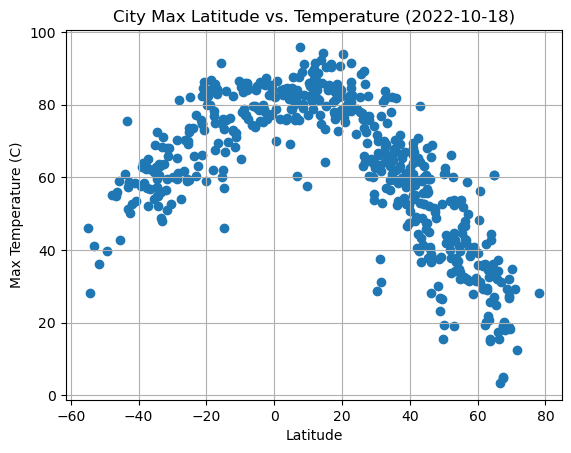

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

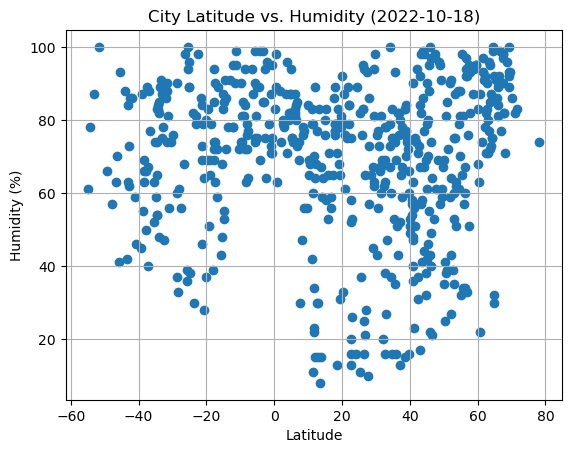

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

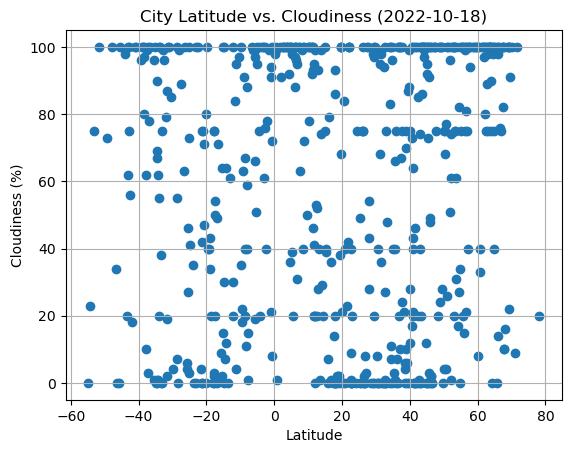

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

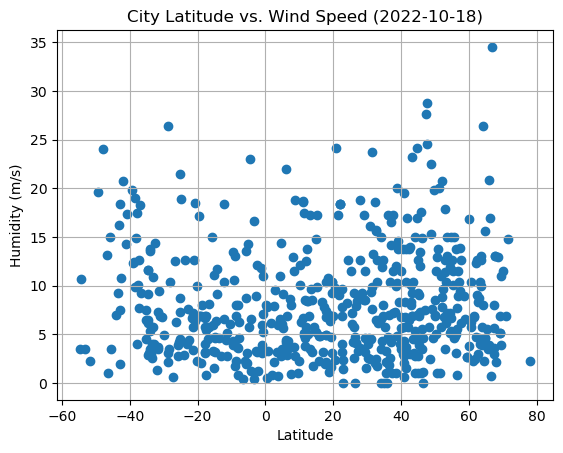

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Humidity (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
#regr = linear_model.LinearRegression()


In [44]:
# Define a function to create Linear Regression plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

NameError: name 'x_values' is not defined

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
#above_35 = titanic[titanic["Age"] > 35]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,whitehorse,60.7161,-135.0538,39.09,65,{'all': 63},"{'speed': 9.01, 'deg': 157, 'gust': 11.39}",CA,1712276036
5,tiksi,71.6872,128.8694,-10.75,98,{'all': 100},"{'speed': 15.73, 'deg': 8, 'gust': 20.42}",RU,1712276037
7,khandyga,62.6667,135.6000,26.17,87,{'all': 93},"{'speed': 6.85, 'deg': 132, 'gust': 13.31}",RU,1712276037
8,grand falls-windsor,48.9332,-55.6649,32.50,94,{'all': 100},"{'speed': 5.99, 'deg': 98, 'gust': 11.99}",CA,1712276038
9,college,64.8569,-147.8028,39.09,57,{'all': 100},"{'speed': 0, 'deg': 0}",US,1712276039


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,78.55,91,{'all': 52},"{'speed': 5.99, 'deg': 94, 'gust': 10}",EC,1712276034
1,west island,-12.1568,96.8225,80.58,83,{'all': 97},"{'speed': 11.5, 'deg': 140}",CC,1712276035
2,nguruka,-5.1092,31.0419,65.16,98,{'all': 93},"{'speed': 2.17, 'deg': 122, 'gust': 2.28}",TZ,1712276035
3,blackmans bay,-43.0167,147.3167,60.73,67,{'all': 2},"{'speed': 1.01, 'deg': 248, 'gust': 1.01}",AU,1712276036
6,margaret river,-33.9500,115.0667,66.83,40,{'all': 38},"{'speed': 9.73, 'deg': 41, 'gust': 23.87}",AU,1712276037


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8147490989152653


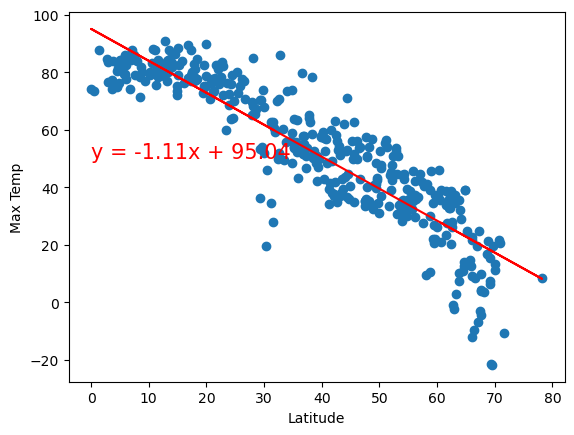

In [55]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Show plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.7161472181434118


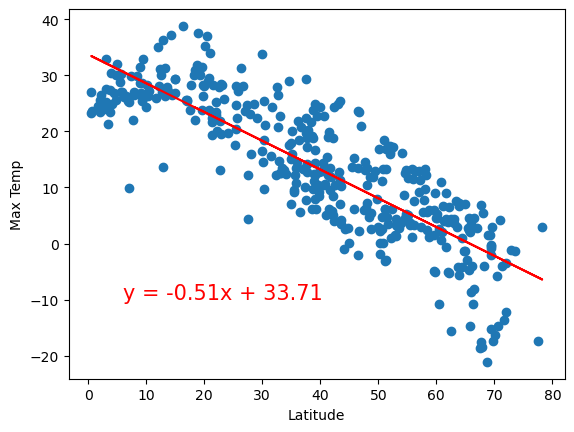

In [15]:
# Linear regression on Northern Hemisphere
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('M')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

The r-squared is: 0.6078073426947279


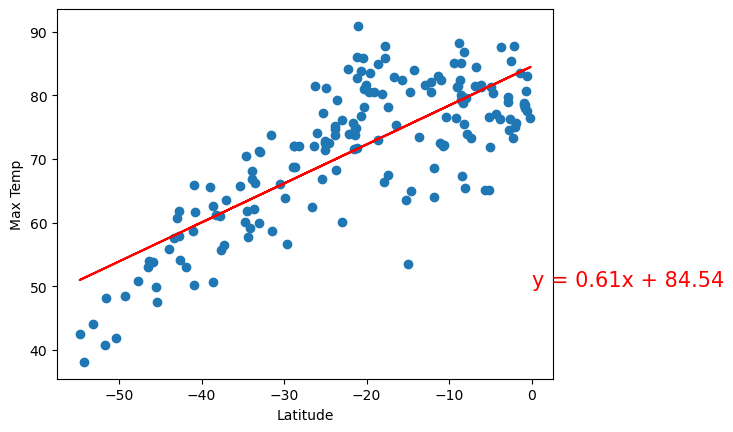

In [56]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Show plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04010049606632781


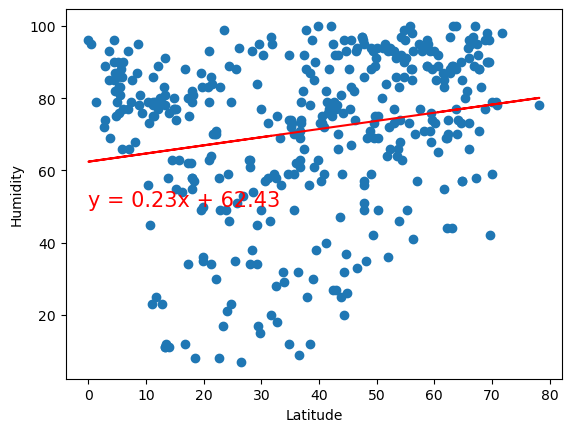

In [57]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Show plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.09206678678199953


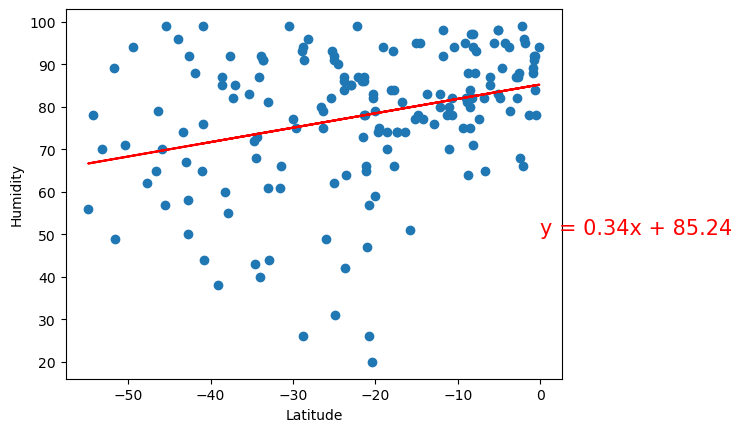

In [60]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Show plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


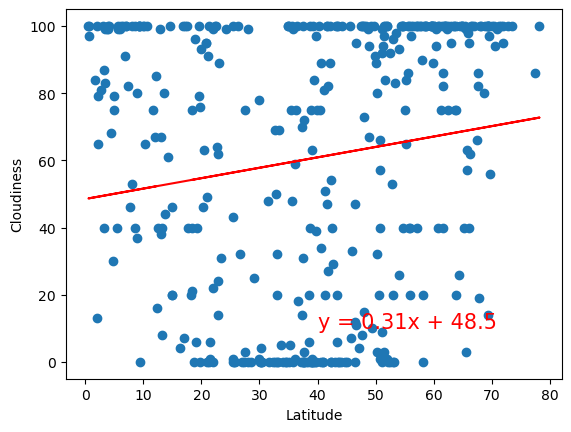

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Show plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.02056735429994368


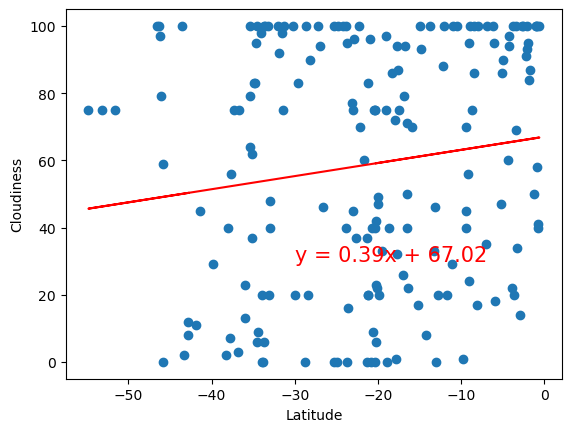

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Show plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


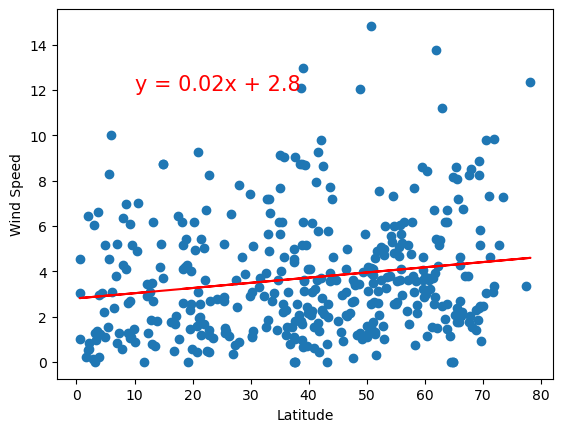

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Show plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.062239040700515696


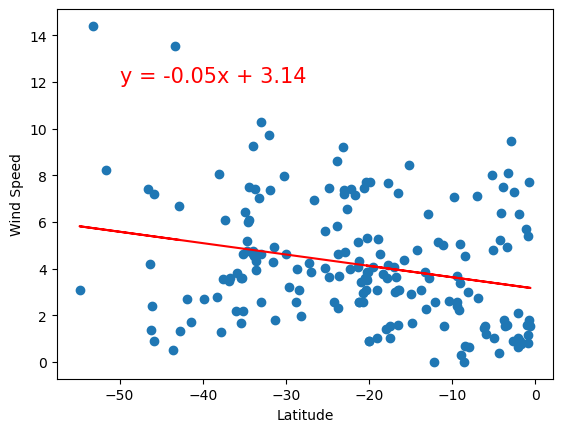

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Show plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE